In [1]:
## Connect to the Database

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Connect to the database file
conn = sqlite3.connect(r"C:/Users/Olaoluwa/Documents/PORA/Data Science/Chinook_Sqlite.sqlite")

In [2]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [3]:
# 2. Read a table

df = pd.read_sql("SELECT * FROM Album", conn)
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [4]:
# 2. Read a table

df = pd.read_sql("SELECT * FROM Artist", conn)
df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [5]:
# using a function to load the tables in the db

def load_table(table_name: str) -> pd.DataFrame:
    """
    Load any table from the SQLite database into a pandas DataFrame.
    
    Parameters:
        table_name (str): Name of the table to load.
    
    Returns:
        pd.DataFrame: The table data as a DataFrame.
    """
    query = f"SELECT * FROM {table_name}"  # This creates a SQL query using an f-string.
    df = pd.read_sql_query(query, conn)    # This line executes the SQL query using the database connection.
    return df

In [6]:
Album = load_table("Album")
Artist = load_table("Artist")
Customer = load_table("Customer")
Employee = load_table("Employee")
Genre = load_table("Genre")
Invoice = load_table("Invoice")
InvoiceLine = load_table("InvoiceLine")
MediaType = load_table("MediaType")
Playlist = load_table("Playlist")
PlaylistTrack = load_table("PlaylistTrack")
Track = load_table("Track")

In [7]:
Artist.head(2)

,ArtistId,Name
0,1,AC/DC
1,2,Accept


In [8]:
Album.head(2)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2


In [9]:
# joining tables in pandas: df.merge

Artist_Album = Artist.merge(right = Album,
            how = 'outer',
            on = 'ArtistId')

In [10]:
Artist_Album.head(2)

,ArtistId,Name,AlbumId,Title
0,1,AC/DC,1.0,For Those About To Rock We Salute You
1,1,AC/DC,4.0,Let There Be Rock


In [11]:
len(Artist_Album)

418

In [12]:
len(Artist)

275

In [13]:
len(Album)

347

In [14]:
# join invoice and invoiceline

Invoice_InvoiceLine = Invoice.merge(right = InvoiceLine,
                                    how = 'left',
                                    on = "InvoiceId")
Invoice_InvoiceLine.head(2)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,InvoiceLineId,TrackId,UnitPrice,Quantity
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,1,2,0.99,1
1,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,2,4,0.99,1


In [15]:
InvoiceLine.head(1)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1


In [16]:
Employee = Employee.rename(columns = {"FirstName": "EmployeeFirstName",
                           "Title": "EmployeeTitle",
                           "City": "EmployeeCity"})
Employee.head(1)

,EmployeeId,LastName,EmployeeFirstName,EmployeeTitle,ReportsTo,BirthDate,HireDate,Address,EmployeeCity,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


In [17]:
# join tables employee -> customer -> invoice -> invoiceline

Employee_Customer = Employee.merge(Customer,
                                   how = 'right',
                                   left_on = 'EmployeeId',
                                   right_on = 'SupportRepId')
Employee_Customer = Employee_Customer.drop(columns = "EmployeeId")
Employee_Customer.head(1)

,LastName_x,EmployeeFirstName,EmployeeTitle,ReportsTo,BirthDate,HireDate,Address_x,EmployeeCity,State_x,Country_x,...,Company,Address_y,City,State_y,Country_y,PostalCode_y,Phone_y,Fax_y,Email_y,SupportRepId
0,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [18]:
Employee_Customer_Invoice_InvoiceLine = (Employee_Customer.merge(Invoice,
                                                                 how = "right",
                                                                 on = "CustomerId")
                                        ).merge(InvoiceLine,
                                               how = "right",
                                               on = "InvoiceId")
Employee_Customer_Invoice_InvoiceLine.head(1)

,LastName_x,EmployeeFirstName,EmployeeTitle,ReportsTo,BirthDate,HireDate,Address_x,EmployeeCity,State_x,Country_x,...,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,InvoiceLineId,TrackId,UnitPrice,Quantity
0,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,...,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98,1,2,0.99,1


In [19]:
# let's find total revenue

Employee_Customer_Invoice_InvoiceLine["Revenue"] = Employee_Customer_Invoice_InvoiceLine["UnitPrice"] * Employee_Customer_Invoice_InvoiceLine["Quantity"]

In [20]:
Employee_Customer_Invoice_InvoiceLine["Revenue"].sum()

np.float64(2328.6000000000004)

In [21]:
Employee_RR = Employee_Customer_Invoice_InvoiceLine.groupby("EmployeeFirstName")["Revenue"].sum()
Employee_RR

EmployeeFirstName
Jane        833.04
Margaret    775.40
Steve       720.16
Name: Revenue, dtype: float64

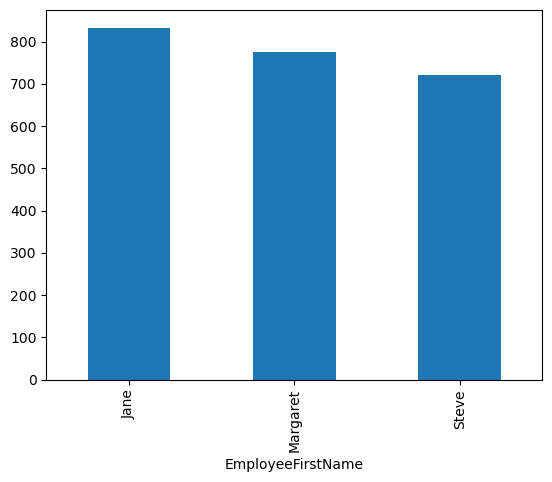

In [22]:
Employee_RR.plot(kind = 'bar')
plt.show()

In [23]:
# find all customers from brazil and sort them by lastname

filtered = Customer[Customer['Country'] == 'Brazil']
filtered.sort_values('LastName')

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
11,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
12,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
10,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5


In [24]:
# count the no of customers in each country and display the top 10 countries

Customer.head(1)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


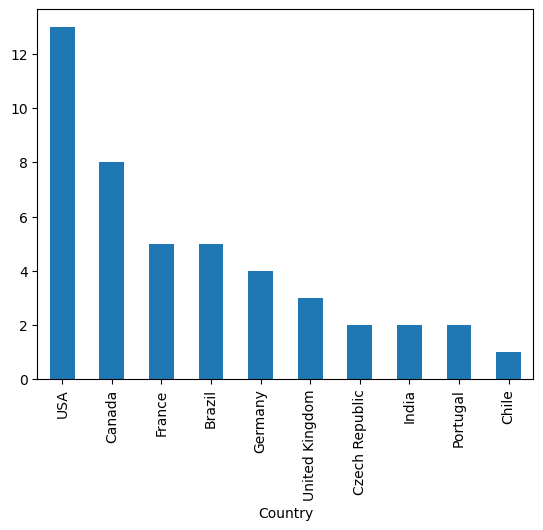

In [25]:
Customer_count = Customer.groupby("Country")["CustomerId"].count()
top_countries = Customer_count.sort_values(ascending = False).head(10)
# top_countries
top_countries.plot(kind = 'bar')
plt.show()

In [27]:
Invoice.head(1)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98


In [28]:
# extract the year and month from invoicedate and analyse monthly sales trend

# coonvert to datetime
Invoice['InvoiceDate'] = pd.to_datetime(Invoice['InvoiceDate'])

# extract year and month
Invoice['Year'] = Invoice["InvoiceDate"].dt.year
Invoice['Month'] = Invoice["InvoiceDate"].dt.month
Invoice['YearMonth'] = Invoice["InvoiceDate"].dt.to_period('M')

# group by year month
monthly_sales = Invoice.groupby("YearMonth")["Total"].sum().reset_index()
monthly_sales

,YearMonth,Total
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


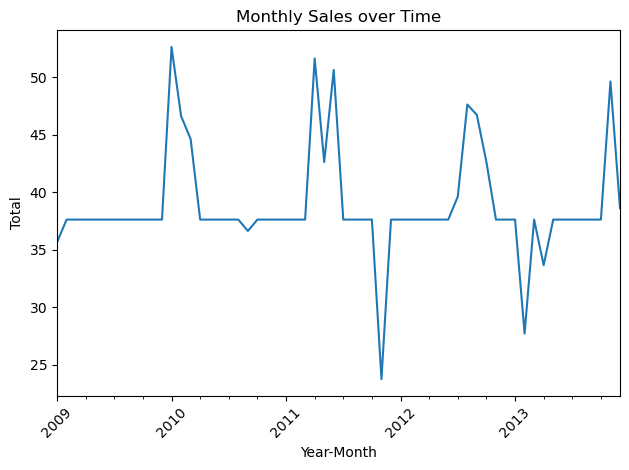

In [29]:
ax = monthly_sales.plot(
    x = "YearMonth",
    y = "Total",
    title = "Monthly Sales over Time",
    legend = False
)

ax.set_xlabel("Year-Month")
ax.set_ylabel("Total")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Pivot Tables

create a pivot table showing total sales by country and year

In [30]:
# load data
invoices = pd.read_sql_query("SELECT * FROM Invoice", conn)

# convert date
invoices["InvoiceDate"] = pd.to_datetime(invoices["InvoiceDate"])
invoices["Year"] = invoices["InvoiceDate"].dt.year

# create pivot table
sales_pivot = pd.pivot_table(
    invoices,
    values = "Total",
    index = "BillingCountry",
    columns = "Year",
    aggfunc = "sum",
    fill_value = 0
)

print(sales_pivot.head(10))

# show top countries
total_by_country = sales_pivot.sum(axis = 1).sort_values(ascending = False)
print("\nTop 10 Countries by Total Sales!")
print(total_by_country.head(10))

Year             2009   2010   2011   2012   2013
BillingCountry                                   
Argentina        0.00  11.88   0.99   0.00  24.75
Australia       11.88   0.99   1.98  22.77   0.00
Austria          1.98  27.77   0.00  11.88   0.99
Belgium          6.93   0.00  24.75   0.00   5.94
Brazil          37.62  41.60  19.80  53.46  37.62
Canada          57.42  76.26  55.44  42.57  72.27
Chile           15.84  17.91   5.94   6.93   0.00
Czech Republic  10.89   9.90  12.87  19.83  36.75
Denmark          5.94   6.93   0.00  15.84   8.91
Finland          8.91   0.00  15.88   0.99  15.84

Top 10 Countries by Total Sales!
BillingCountry
USA               523.06
Canada            303.96
France            195.10
Brazil            190.10
Germany           156.48
United Kingdom    112.86
Czech Republic     90.24
Portugal           77.24
India              75.26
Chile              46.62
dtype: float64


In [31]:
top_10_sales = sales_pivot.head(10)

In [33]:
transposed = top_10_sales.T

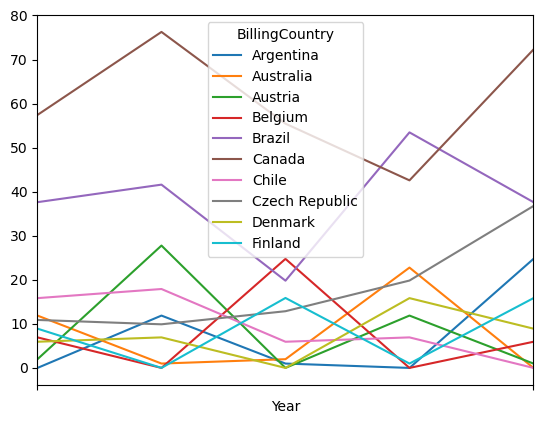

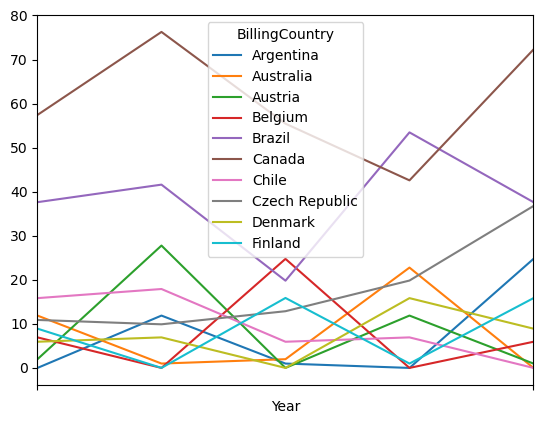

In [36]:
transposed.plot()
plt.show()